In [11]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import matplotlib as mpl
import glob

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
data_pathE = "/home/haue/repositories/Masters/data/bananas/banana_withE"
data_pathnoE = "/home/haue/repositories/Masters/data/bananas"

outputdir = "/figure_output/"

In [13]:
## Load in all files from the datapath with the suffix mlio.root
bananaE_files = glob.glob(os.path.join(data_pathE, "*mlio.root"))
banananoE_files = glob.glob(os.path.join(data_pathnoE, "*mlio.root"))

In [14]:
#####
#Loading in of parameters needed for plotting and assigning them to lists
#These lists holds entries 0-3 which corresponds to detector id's 1-4
#####
Es_E = [[_] for _ in range(0,4)]
front_telescope_Es_E = [[_] for _ in range(0,4)]
back_telescope_Es_E = [[_] for _ in range(0,4)]
angles_of_incidence_E = [[_] for _ in range(0,4)]
Edeps_E = [[_] for _ in range(0,4)]

for f in bananaE_files:
    r = uproot.open(f)["a"]
    dum = r.arrays(["id", "E", "fEdep", "bEdep", "angle", "Edep"])
    ids = ak.flatten(dum.id)
    es = ak.flatten(dum.E)
    fedeps = ak.flatten(dum.fEdep)
    bedeps = ak.flatten(dum.bEdep)
    thets = ak.flatten(dum.angle)
    Edeposits = ak.flatten(dum.Edep)
    for i in range(0, 4) :
        mask = (ids == i)
        Edeps_E[i].extend(Edeposits[mask])
        Es_E[i].extend(es[mask])
        angles_of_incidence_E[i].extend(thets[mask])
        front_telescope_Es_E[i].extend(fedeps[mask])
        back_telescope_Es_E[i].extend(bedeps[mask])
    #print("file ", f, " processed")
    if f==bananaE_files[-1]:
        print("Processing done!")

### Converting energies to MeV and angles to degrees
Edeps_E = [np.array(arr)/1e3 for arr in Edeps_E]
Es_E = [np.array(arr)/1e3 for arr in Es_E]
angles_of_incidence_E = [np.rad2deg(np.array(arr)) for arr in angles_of_incidence_E]
front_telescope_Es_E = [np.array(arr)/1e3 for arr in front_telescope_Es_E]
back_telescope_Es_E = [np.array(arr)/1e3 for arr in back_telescope_Es_E]

#####
#Loading in of parameters needed for plotting and assigning them to lists
#These lists holds entries 0-3 which corresponds to detector id's 1-4
#####
Es = [[_] for _ in range(0,4)]
front_telescope_Es = [[_] for _ in range(0,4)]
back_telescope_Es = [[_] for _ in range(0,4)]
angles_of_incidence = [[_] for _ in range(0,4)]
Edeps = [[_] for _ in range(0,4)]

for f in banananoE_files:
    r = uproot.open(f)["a"]
    dum = r.arrays(["id", "E", "fEdep", "bEdep", "angle", "Edep"])
    ids = ak.flatten(dum.id)
    es = ak.flatten(dum.E)
    fedeps = ak.flatten(dum.fEdep)
    bedeps = ak.flatten(dum.bEdep)
    thets = ak.flatten(dum.angle)
    Edeposits = ak.flatten(dum.Edep)
    for i in range(0, 4) :
        mask = (ids == i)
        Edeps[i].extend(Edeposits[mask])
        Es[i].extend(es[mask])
        angles_of_incidence[i].extend(thets[mask])
        front_telescope_Es[i].extend(fedeps[mask])
        back_telescope_Es[i].extend(bedeps[mask])
    #print("file ", f, " processed")
    if f==banananoE_files[-1]:
        print("Processing done!")

### Converting energies to MeV and angles to degrees
Edeps = [np.array(arr)/1e3 for arr in Edeps]
Es = [np.array(arr)/1e3 for arr in Es]
angles_of_incidence = [np.rad2deg(np.array(arr)) for arr in angles_of_incidence]
front_telescope_Es = [np.array(arr)/1e3 for arr in front_telescope_Es]
back_telescope_Es = [np.array(arr)/1e3 for arr in back_telescope_Es]

Processing done!
Processing done!


Text(0.5, 0.91, 'Proton spectrum for the four DSSSDs in the plane')

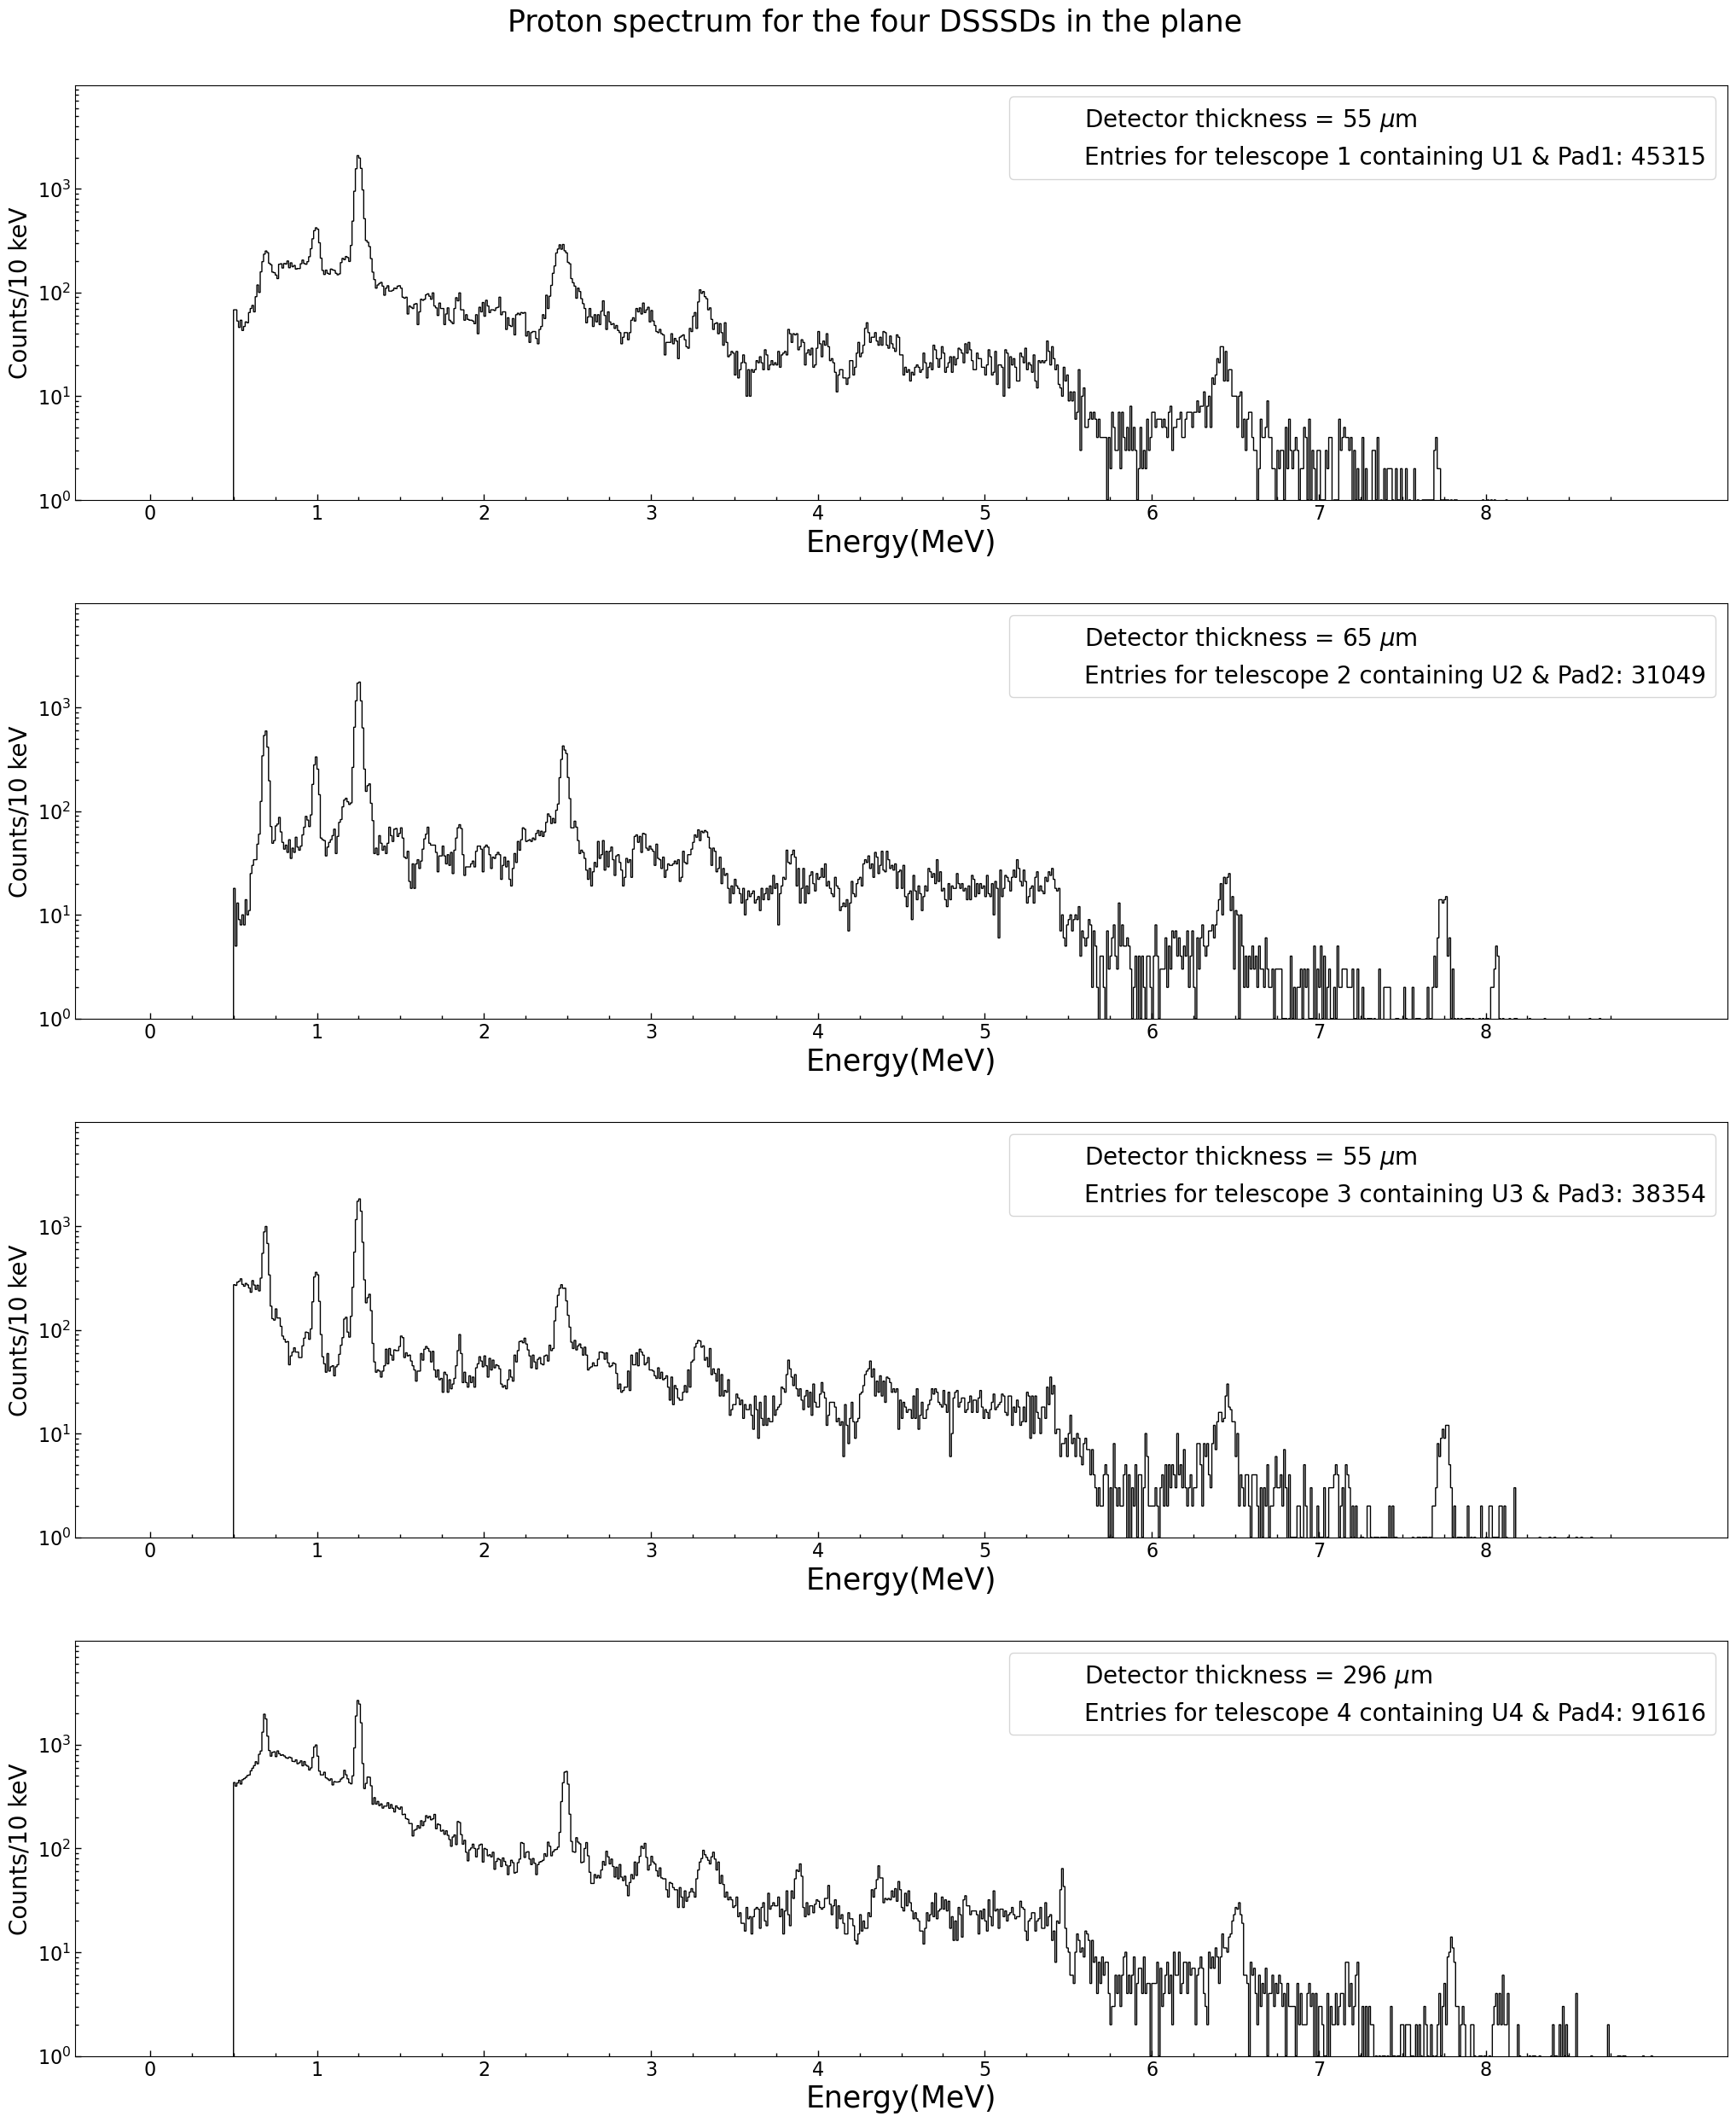

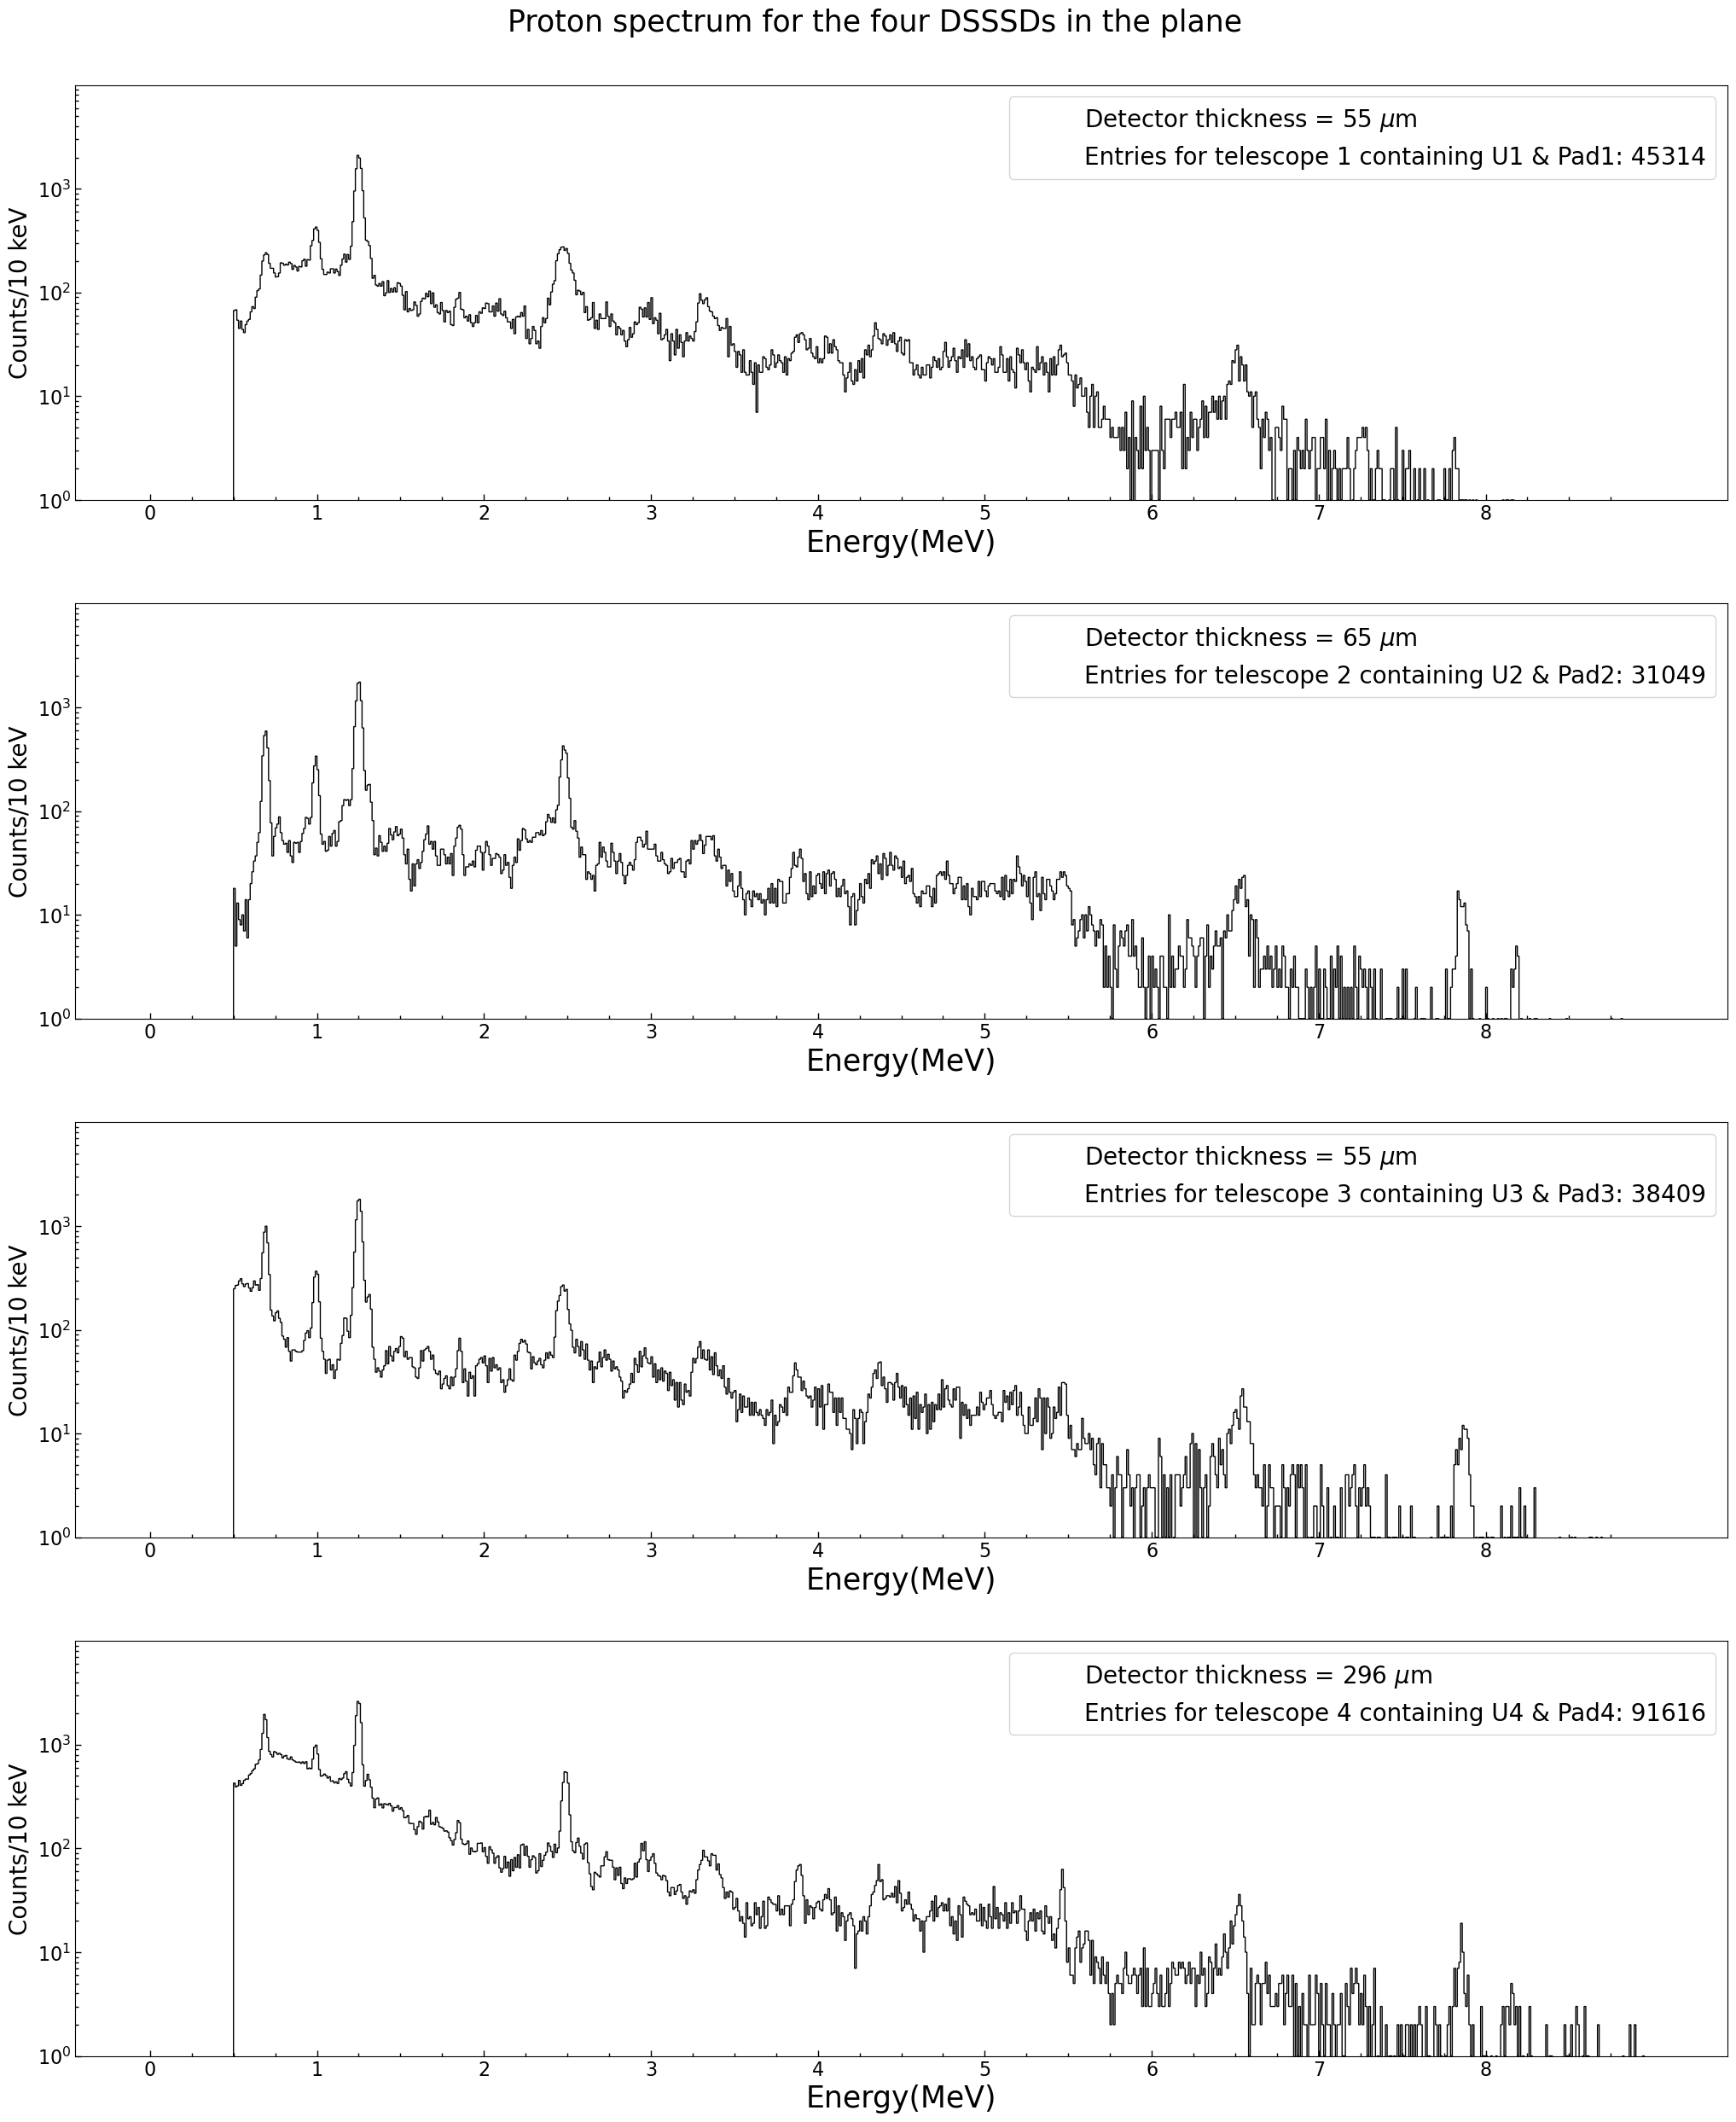

In [15]:

####################
#Sum spektra for the 4 ids where the spurious zone exclusion has not been taken into account, neither has the beta region
# and the dsssd rim has not been excluded.
####################

bin_width = 0.01 # keV
bins = np.arange(0, 9 + bin_width, bin_width)
thicknesses = [55, 65, 55, 296] #for U1, U2, U3, U4(id=0,1,2,3) U5=1002 um U6 = 67 um
fig, axs = plt.subplots(4, 1, figsize=(25,30))#, sharex=True)
plt.subplots_adjust( hspace = 0.25)
ax0, ax1, ax2, ax3 = axs
for (i,ax, e) in zip(range(0,4),axs, Es):
   e = e[e>0.5]
   label1 = f"Entries for telescope {i+1} containing U{i+1} & Pad{i+1}: {len(e)}"
   label2 = r"Detector thickness = {} $\mu$m".format(thicknesses[i])
   ax.plot([], [], ls='', color='none', label=label2)
   ax.plot([], [], ls='', color='none', label=label1)
   ax.hist(e, bins=bins, histtype='step', color='k')
   ax.set_yscale("log")
   ax.set_xticks(np.arange(0, 9, 0.250), minor=True)
   ax.set_xticks(np.arange(0, 9, 1))
   ax.legend(loc='upper right', fontsize=20)
   ax.set_ylim(ymin=1, ymax=9999)
   ax.set_xlabel("Energy(MeV)", fontsize=25)
   ax.set_ylabel("Counts/10 keV", fontsize=20)
   ax.tick_params(axis='y', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
   ax.tick_params(axis='x', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='x', which='minor', direction='in', length=3, width=1)
plt.suptitle("Proton spectrum for the four DSSSDs in the plane", fontsize=25, y=0.91)

fig, axs2 = plt.subplots(4, 1, figsize=(25,30))#, sharex=True)
plt.subplots_adjust( hspace = 0.25)
ax0, ax1, ax2, ax3 = axs2
for (i,ax, e) in zip(range(0,4),axs2, Es_E):
   e = e[e>0.5]
   label1 = f"Entries for telescope {i+1} containing U{i+1} & Pad{i+1}: {len(e)}"
   label2 = r"Detector thickness = {} $\mu$m".format(thicknesses[i])
   ax.plot([], [], ls='', color='none', label=label2)
   ax.plot([], [], ls='', color='none', label=label1)
   ax.hist(e, bins=bins, histtype='step', color='k')
   ax.set_yscale("log")
   ax.set_xticks(np.arange(0, 9, 0.250), minor=True)
   ax.set_xticks(np.arange(0, 9, 1))
   ax.legend(loc='upper right', fontsize=20)
   ax.set_ylim(ymin=1, ymax=9999)
   ax.set_xlabel("Energy(MeV)", fontsize=25)
   ax.set_ylabel("Counts/10 keV", fontsize=20)
   ax.tick_params(axis='y', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
   ax.tick_params(axis='x', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='x', which='minor', direction='in', length=3, width=1)
plt.suptitle("Proton spectrum for the four DSSSDs in the plane", fontsize=25, y=0.91)